In [126]:
import pandas as pd
import coremltools as cml
from sklearn import tree
from sklearn import linear_model
from sklearn import metrics
import numpy as np
import graphviz
from IPython.display import Image

## Building Data and Saving as JSON File

In [127]:
csv_d = pd.read_csv('simulated.csv')
csv_d.to_json('simulated.json', orient='records')

## Making a model from simulated dataset above

In [128]:
train_data = pd.read_json('simulated.json')
test_data = None
train_data

,comment,jog_abs_dist,jog_abs_time,jog_frac_dist,jog_frac_time,stage
0,'week 1',1.00,8,0.40,0.40,1
1,'week 2',1.20,12,0.60,0.43,2
2,'week 3',1.20,9,0.50,0.45,3
3,'week 4',2.40,16,0.75,0.70,4
4,'week 5',2.40,15,0.75,0.72,5
5,'week 6 d1',4.43,18,0.78,0.75,6
6,'week 6 d2',3.22,20,0.89,0.87,7
7,'week 6 d3',3.62,22,1.00,1.00,8
8,'week 7',4.02,25,1.00,1.00,9
9,'week 8',4.43,28,1.00,1.00,10


In [129]:
X = train_data.loc[:, ['jog_abs_time', 'jog_frac_time', 'jog_abs_dist', 'jog_frac_dist']]
Y = train_data.loc[:, ['stage']]
print(X.shape)
print(Y.shape)

(11, 4)
(11, 1)


In [130]:
model = tree.DecisionTreeClassifier()
# model = linear_model.LogisticRegression()
model.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

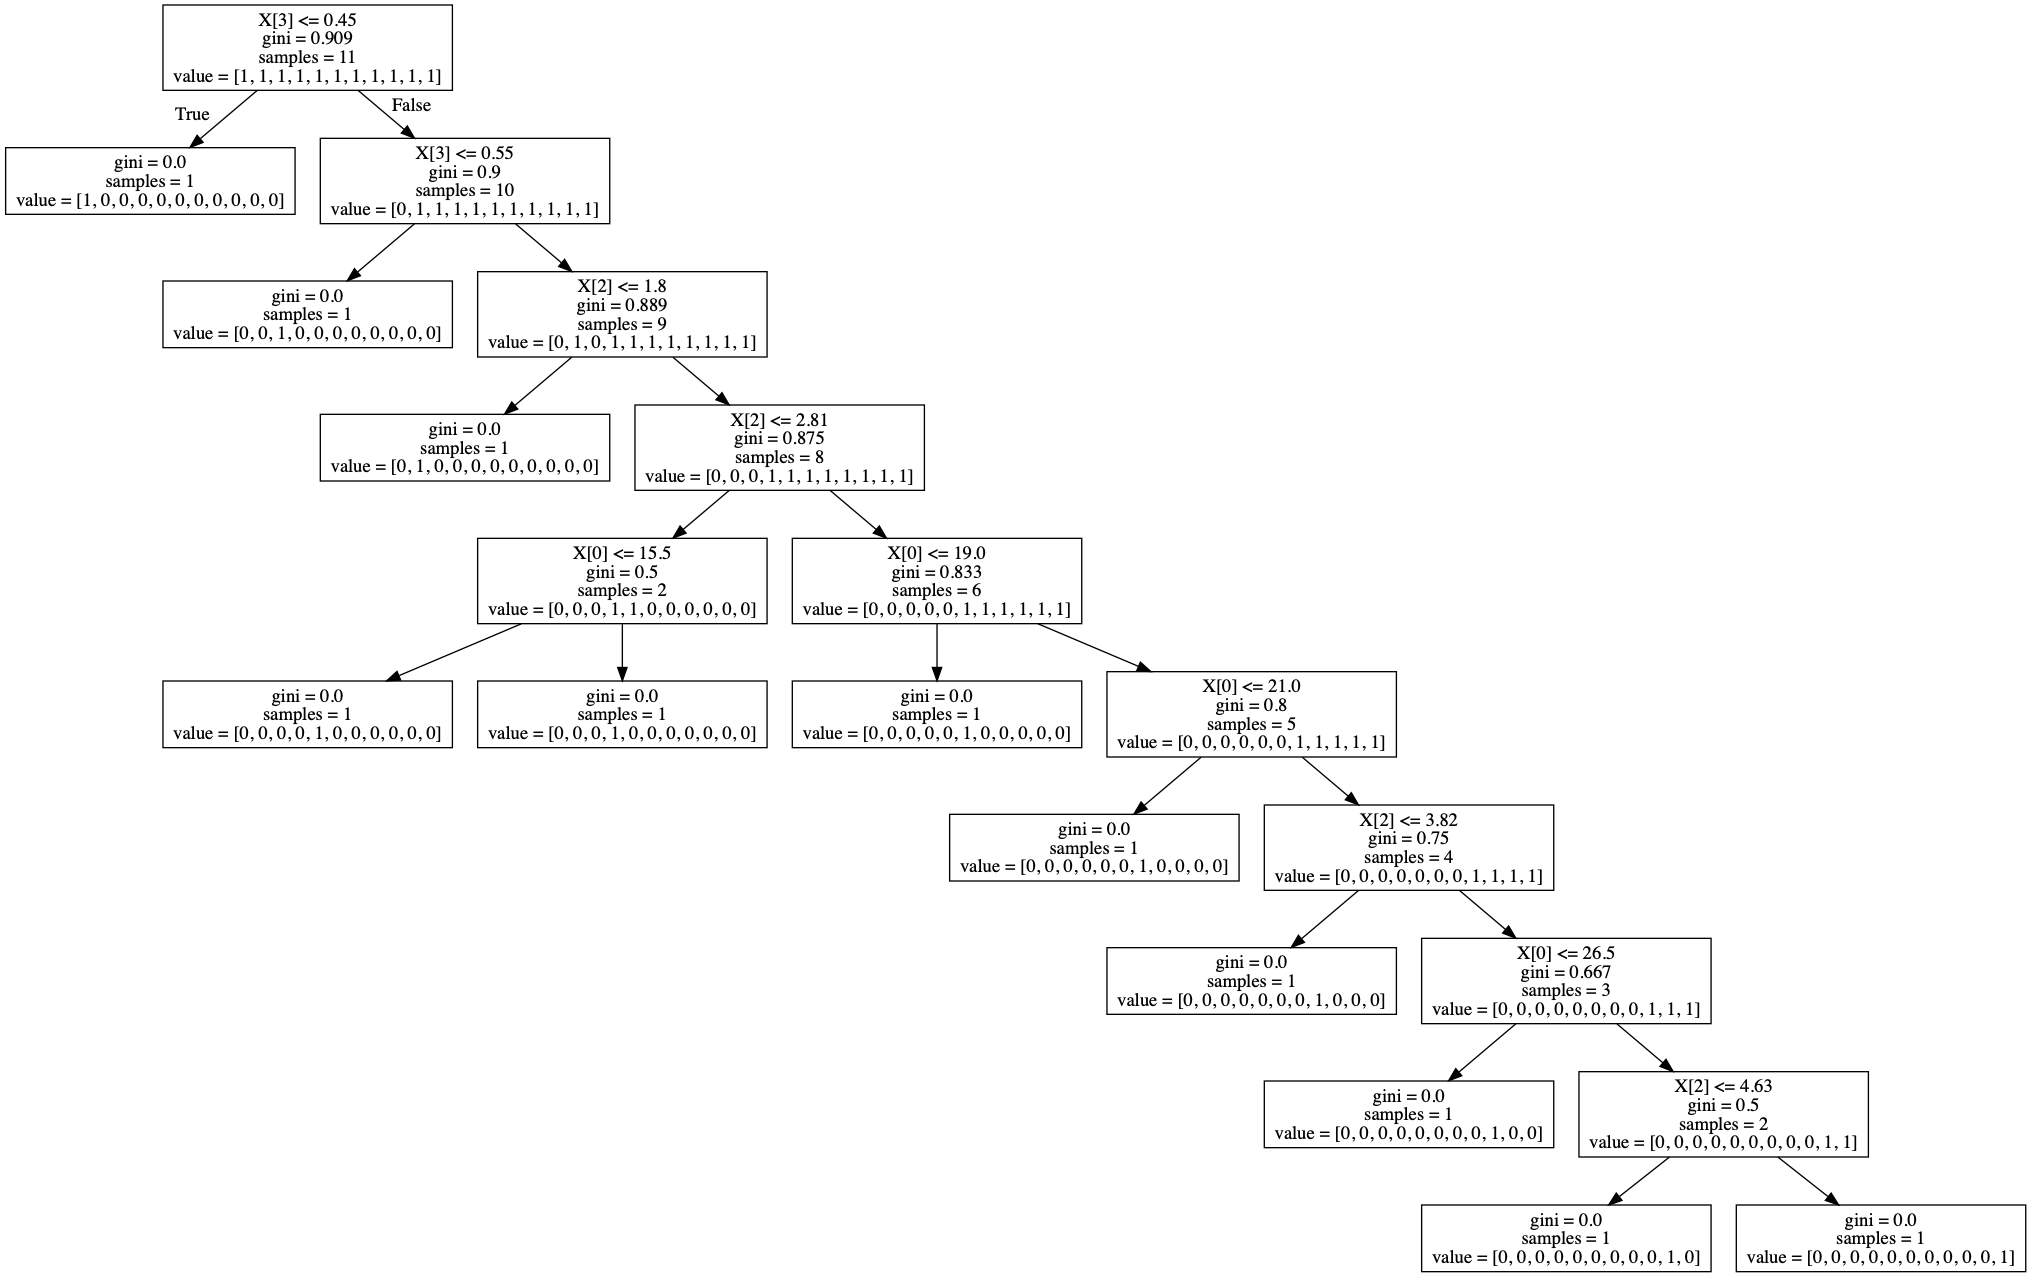

In [132]:
dot_data = tree.export_graphviz(model, out_file='sample.dot')
!dot -Tpng sample.dot -o tree.png
Image('tree.png')

In [133]:
model.predict([[9,0.5,1.2,0.40]])

array([1])

In [134]:
cmlmodel = cml.converters.sklearn.convert(model, ['jog_abs_time', 'jog_frac_time', 'jog_abs_dist', 'jog_frac_dist'],"stage")

In [135]:
# potential Pull Request
# cml.models.utils.save_spec(model,'/Users/akshitarora/Documents/GitHub/courses/ml_hci/SleepCalculator.mlmodel')

AttributeError: 'DecisionTreeClassifier' object has no attribute 'SerializeToString'